<a href="https://colab.research.google.com/github/Talieh-m/Data_Science/blob/main/Naive_bayes_SVC_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
#Data analysis
import numpy as np
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

# **Import Dataset**

In [ ]:
df=pd.read_csv('new_train.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [ ]:
df.shape

(32950, 16)

# **Data Preparation**

In [ ]:
df.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

In [ ]:
for i in ('job','marital','education', 'default','housing','loan','contact','month','day_of_week','previous','poutcome','y'):
  print(f'~*{i} cathegories:')
  print(df[i].unique())

~*job cathegories:
['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'unknown'
 'housemaid']
~*marital cathegories:
['married' 'divorced' 'single' 'unknown']
~*education cathegories:
['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'unknown' 'basic.6y' 'illiterate']
~*default cathegories:
['unknown' 'no' 'yes']
~*housing cathegories:
['no' 'yes' 'unknown']
~*loan cathegories:
['no' 'yes' 'unknown']
~*contact cathegories:
['cellular' 'telephone']
~*month cathegories:
['nov' 'jul' 'may' 'jun' 'aug' 'mar' 'oct' 'apr' 'sep' 'dec']
~*day_of_week cathegories:
['wed' 'mon' 'tue' 'fri' 'thu']
~*previous cathegories:
[0 1 3 4 2 6 5 7]
~*poutcome cathegories:
['nonexistent' 'failure' 'success']
~*y cathegories:
['no' 'yes']


In [ ]:
# finding the number of unknowns in dataset
for i in ('job','marital','education', 'default','housing','loan'):
  print(df[i].value_counts())

admin.           8314
blue-collar      7441
technician       5400
services         3196
management       2345
retired          1366
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
unknown           265
Name: job, dtype: int64
married     19953
single       9257
divorced     3675
unknown        65
Name: marital, dtype: int64
university.degree      9736
high.school            7596
basic.9y               4826
professional.course    4192
basic.4y               3322
basic.6y               1865
unknown                1397
illiterate               16
Name: education, dtype: int64
no         26007
unknown     6940
yes            3
Name: default, dtype: int64
yes        17254
no         14900
unknown      796
Name: housing, dtype: int64
no         27131
yes         5023
unknown      796
Name: loan, dtype: int64


In [ ]:
df=df.applymap(lambda x: np.nan if x == 'unknown' else x)

In [ ]:
df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f7a4416d0>,
      dtype=object)

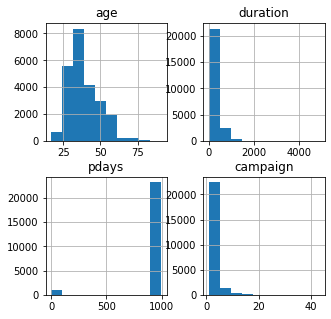

In [ ]:
figur=plt.figure(figsize = (5,5))
axis=figur.gca()
cont_cols=['age','duration','pdays','campaign']
df.hist(cont_cols,ax=axis)

# **Check for Balancing**

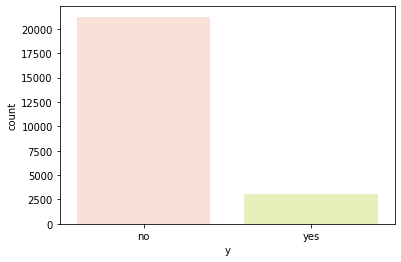

In [ ]:
sns.countplot(x='y',data=df, palette= [ "#fee0d2","#edf8b1"])

# **Correlation**

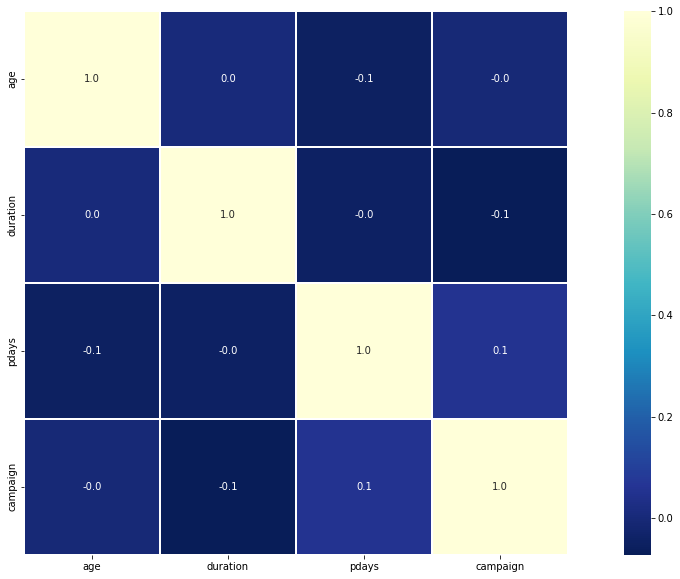

In [ ]:
plt.figure(figsize=(20,10))
cont_cols=['age','duration','pdays','campaign']
df_co = df[cont_cols].corr()
sns.heatmap(df_co,cbar = True,  square = True, annot = True, fmt= '.1f',xticklabels= True, yticklabels= True,cmap='YlGnBu_r', linewidths=.5)

# **Scaling the data**

In [ ]:
sc = StandardScaler()
x=np.array(df['age'])
x=np.reshape(x,(1,len(x)))
cont_cols=['age','duration','pdays','campaign']
for i in cont_cols:
  x=np.array(df[i])
  x=np.reshape(x,(len(x),1))
  df[i]=sc.fit_transform(x)

# **Encoding categorical data**

In [ ]:
# transforming booleans
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
booleans=['default','housing','loan','contact','y']
for i in booleans:
  df[i]=le.fit_transform(df[i])

#defining Dependent & independent variables
x= df.iloc[:,:-1].values
y=df.iloc[:,-1].values

#transforming categorical
ct=ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [1,2,3,8,9,14])], remainder ="passthrough")
x=np.array (ct.fit_transform(x))

# **Splitting the Dataset into train set & test set**

In [ ]:
x_train,x_test, y_train, y_test= train_test_split(x,y, random_state=0, test_size=.25)

# **Balancing the Dataset**

In [ ]:
import imblearn
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
xo_train, yo_train = adasyn.fit_resample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# **Training the models**

accuracy_score=0.818


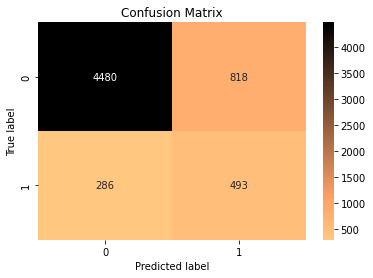

In [ ]:
#naive bayes
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, cmap="copper_r", fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix")
Accuracy_Score=np.round(accuracy_score(y_test, y_pred), decimals=3)
print("accuracy_score={a}".format(a=Accuracy_Score))

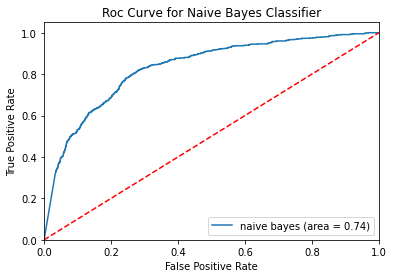

In [ ]:
#Roc Curve
naive_roc_auc = roc_auc_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='naive bayes (area = %0.2f)' % naive_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve for Naive Bayes Classifier')
plt.legend(loc="lower right")
plt.show()

accuracy_score2=0.889


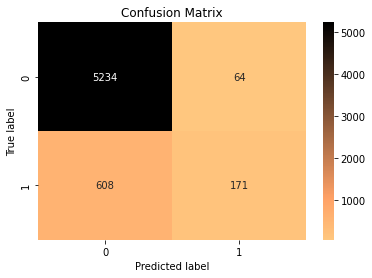

In [ ]:
#SVM
classifier_s= SVC(kernel = 'linear', random_state = 0, probability=True)
classifier_s.fit(x_train, y_train)
y_pred= classifier_s.predict(x_test)
cm2 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm2,annot=True, cmap="copper_r", fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix")
Accuracy_Score2=np.round(accuracy_score(y_test, y_pred), decimals=3)
print("accuracy_score2={a}".format(a=Accuracy_Score2))

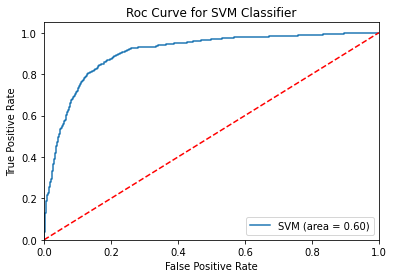

In [ ]:
#Roc Curve
svm_roc_auc = roc_auc_score(y_test, y_pred)
roc_auc_svm = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, classifier_s.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve for SVM Classifier')
plt.legend(loc="lower right")
plt.show()

accuracy_score3=0.868


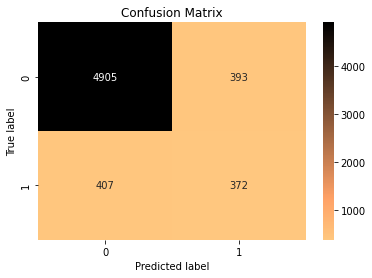

In [ ]:
#Decision Trees
classifier_d = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_d.fit(x_train, y_train)
y_pred_d= classifier_d.predict(x_test)
cm3 = confusion_matrix(y_test, y_pred_d)
sns.heatmap(cm3,annot=True, cmap="copper_r", fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix")
Accuracy_Score3=np.round(accuracy_score(y_test, y_pred_d), decimals=3)
print("accuracy_score3={a}".format(a=Accuracy_Score3))

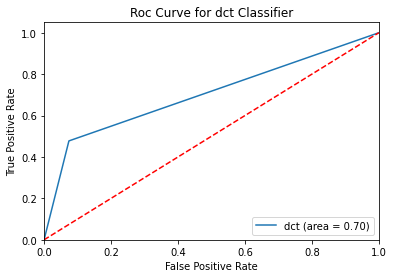

In [ ]:
#Roc Curve
dct_roc_auc = roc_auc_score(y_test, y_pred_d)
roc_auc_dct = roc_auc_score(y_test, y_pred_d)
fpr, tpr, thresholds = roc_curve(y_test, classifier_d.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='dct (area = %0.2f)' % dct_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve for dct Classifier')
plt.legend(loc="lower right")
plt.show()